# Data exploration

This notebook was used for initial data exploration on a limited amount of data

In [13]:
# Python imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import lib.features as features
import lib.breeds as breeds
import lib.plots as plots

In [14]:
# Data location
data_folder = '../data/csv/'
files = '10101.smo.csv'

In [15]:
# Load dataframad and add times to it
df = features.load_features(data_folder + files)
df = features.add_times(df)

def to_hours(tick):
    return tick / 900.0

df['hours'] = df.index.map(to_hours)
df["time"] = df.index
df["day"] = df["time"] // 21600

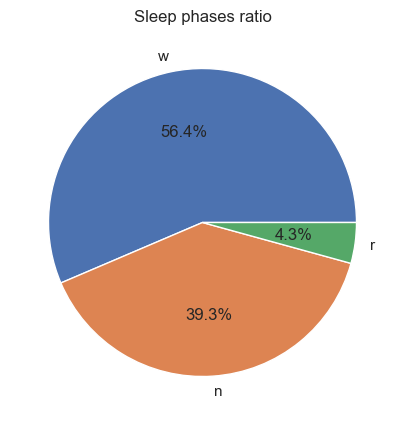

In [16]:
# Aggregate "c57bl6" mice strain and compute sleep phases ratio
data_files = [mice + ".smo.csv" for mice in breeds.mice_breeds["c57bl6"]][:]
df1 = pd.DataFrame()
for file in data_files:
    pd.concat([df1, features.load_features(data_folder + file)])
    
sleep_phases = df['state'].value_counts()
total_sleep_phases = sleep_phases.sum()
sleep_phases_ratio = sleep_phases / total_sleep_phases

# plot the pie chart
plt.figure(figsize=(5, 5))
plt.pie(sleep_phases_ratio, labels=sleep_phases_ratio.index, autopct='%1.1f%%')
plt.title('Sleep phases ratio')
plt.show()

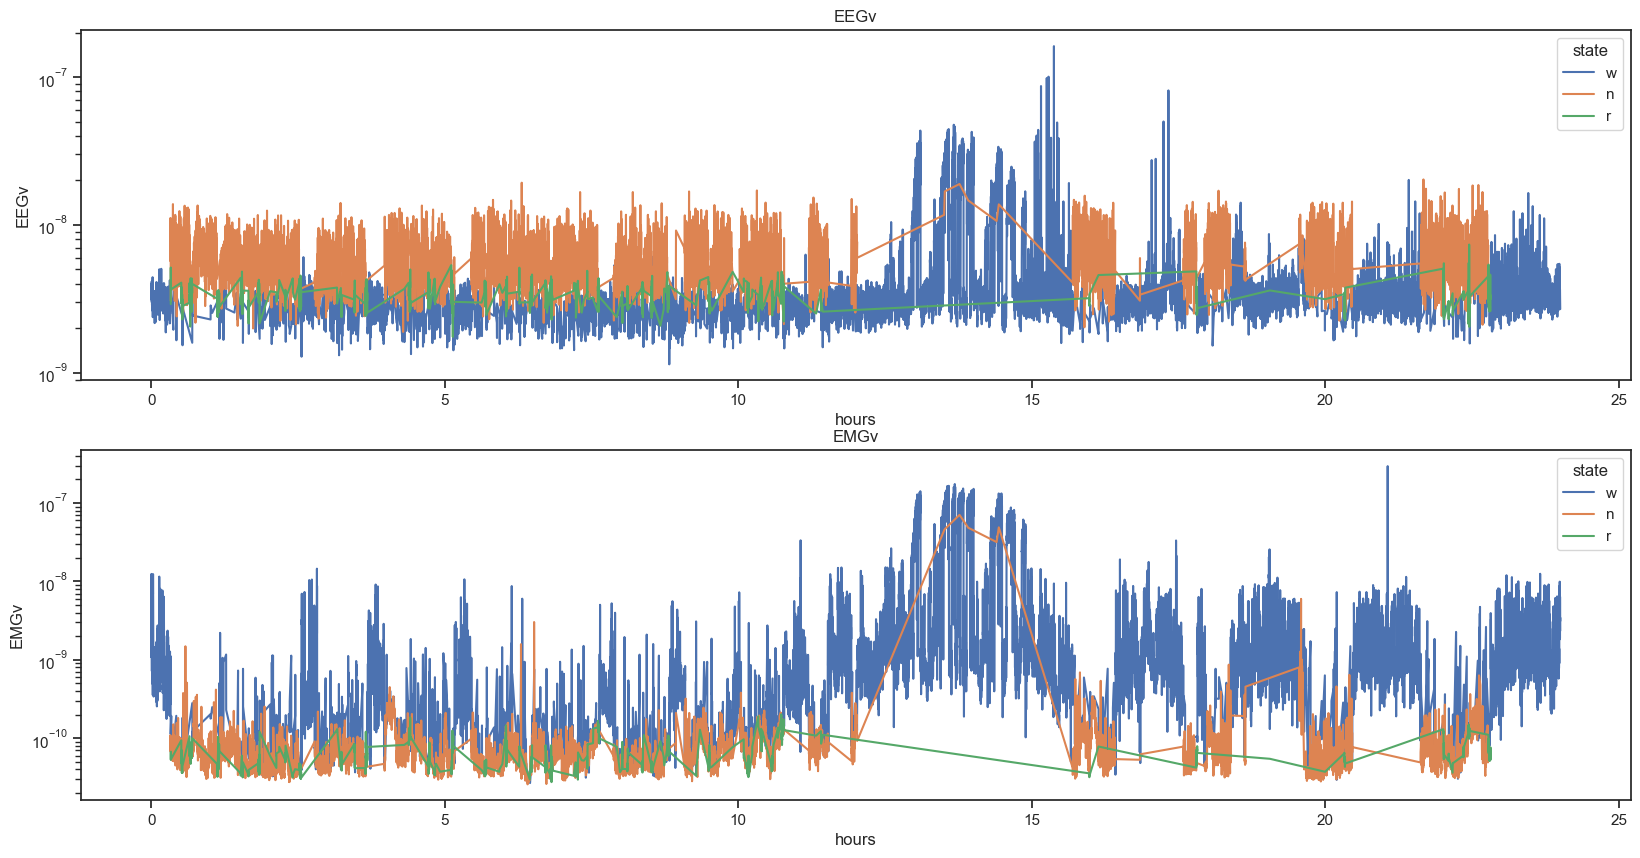

In [17]:
# Plot the EEGv and EMGv signals for the first day, for each state
plots.plot_df(data=df, day=0, log=True)

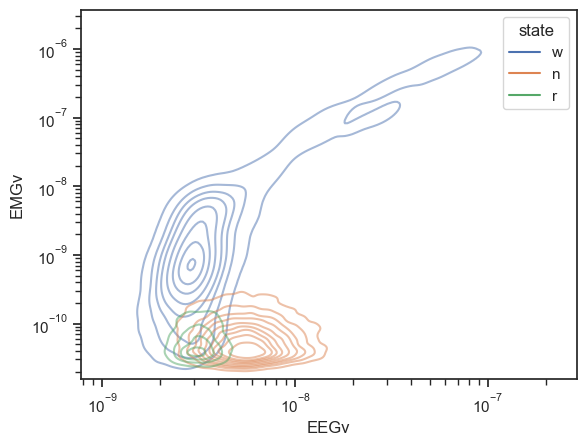

In [18]:
# Plot the EEGv and EMGv signals distribution for the 4 days, for each state
sns.kdeplot(data=df, x="EEGv", y="EMGv", hue="state", fill=False, log_scale=True, alpha=.50)
plt.show()

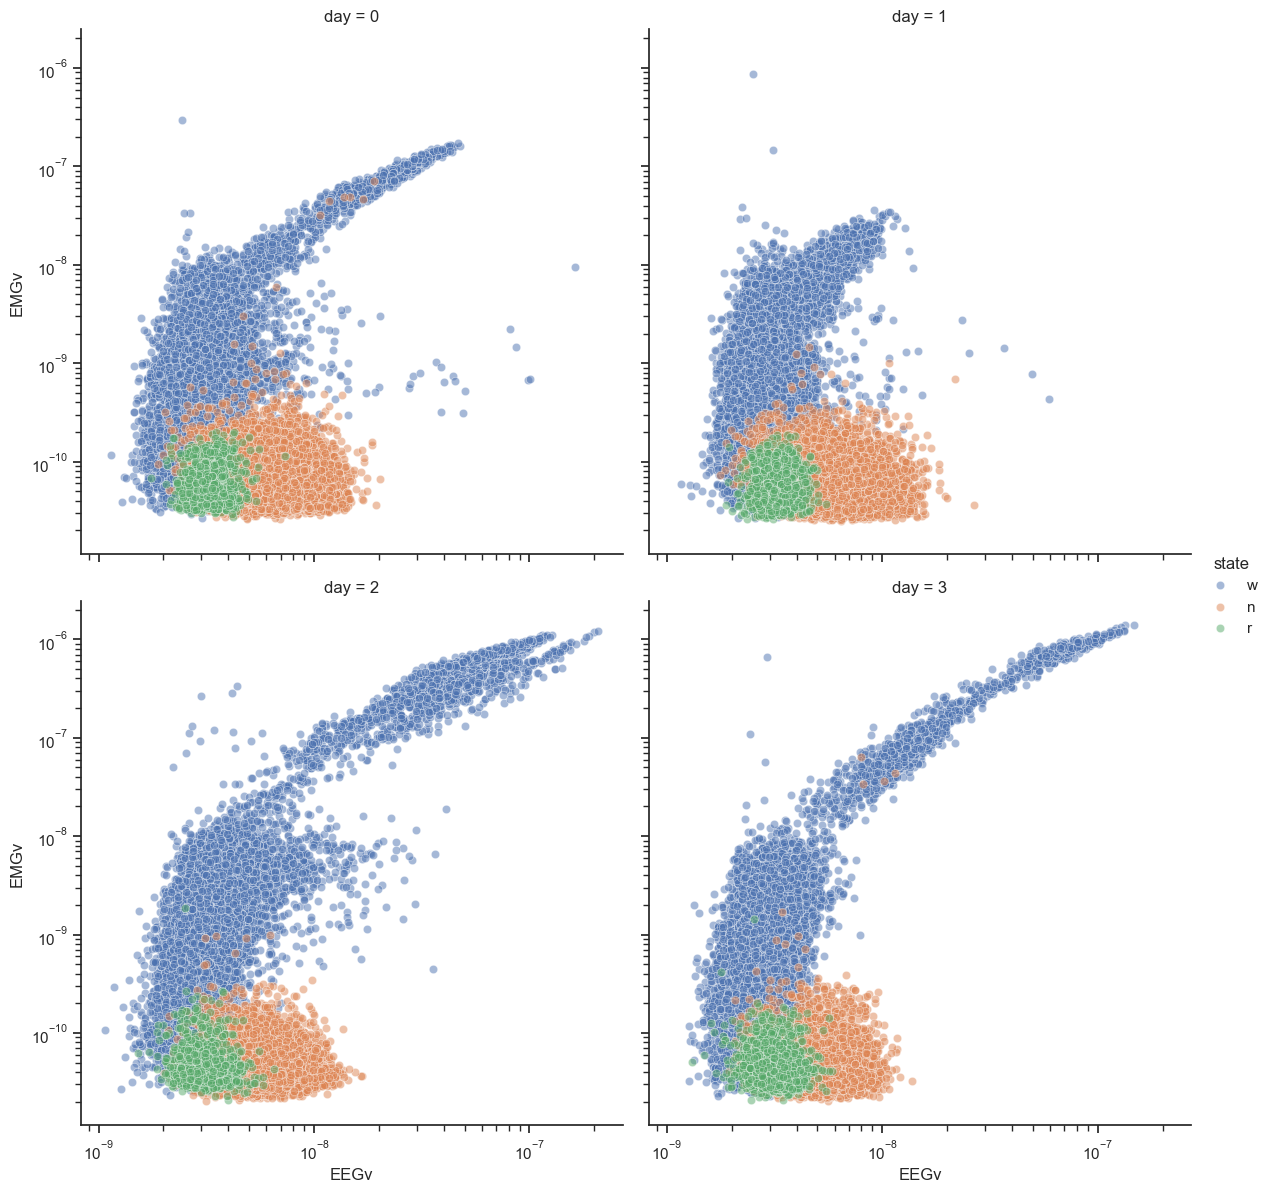

In [19]:
# Scatter plot of the EEGv and EMGv signals for the 4 days, for each state
plots.scatter(data=df)

In [20]:
# Plot the EEGv and EMGv signals for each first day, for each state
dfs = pd.DataFrame()

# Can aggregate multiple files
for file in ["10101.smo.csv"]:
    data = pd.read_csv(data_folder + file)
    dfs = pd.concat([dfs, data], ignore_index=True)

dfs = features.add_times(dfs)
plots.density(dfs)
plt.show()